In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime
%matplotlib notebook

In [2]:
start = datetime.datetime(2020,6,1)
end = datetime.datetime.now()

In [3]:
df = web.DataReader('KO','yahoo',start,end)

<IPython.core.display.Javascript object>


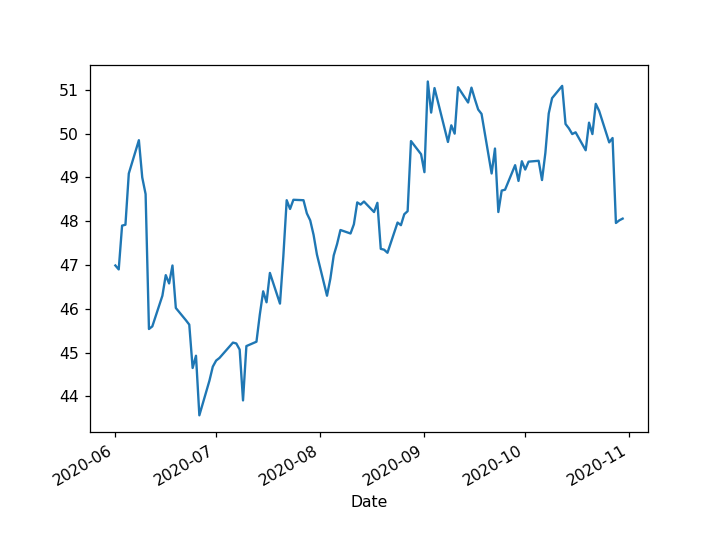

In [4]:
df['Close'].plot()
df = df.drop(['Open','High','Low','Volume','Adj Close'],axis=1)

In [5]:
df['Closes1'] = df['Close'].shift(1)
df['Closes2'] = df['Close'].shift(2)

df['Closesb1'] = df['Close'].shift(-1)
df['Closesb2'] = df['Close'].shift(-2)
df.head(30)

,Close,Closes1,Closes2,Closesb1,Closesb2
Date,,,,,
2020-06-01,46.990002,NaN,NaN,46.900002,47.900002
2020-06-02,46.900002,46.990002,NaN,47.900002,47.919998
2020-06-03,47.900002,46.900002,46.990002,47.919998,49.090000
2020-06-04,47.919998,47.900002,46.900002,49.090000,49.849998
2020-06-05,49.090000,47.919998,47.900002,49.849998,49.000000
2020-06-08,49.849998,49.090000,47.919998,49.000000,48.619999
2020-06-09,49.000000,49.849998,49.090000,48.619999,45.540001
2020-06-10,48.619999,49.000000,49.849998,45.540001,45.599998
2020-06-11,45.540001,48.619999,49.000000,45.599998,46.299999


In [6]:
df['trend'] = np.where((df['Close']>df['Closes1']) & (df['Close']>df['Closes2'])& (df['Close']>df['Closesb1'])& (df['Close']>df['Closesb2']),df['Close'],np.nan)

<IPython.core.display.Javascript object>


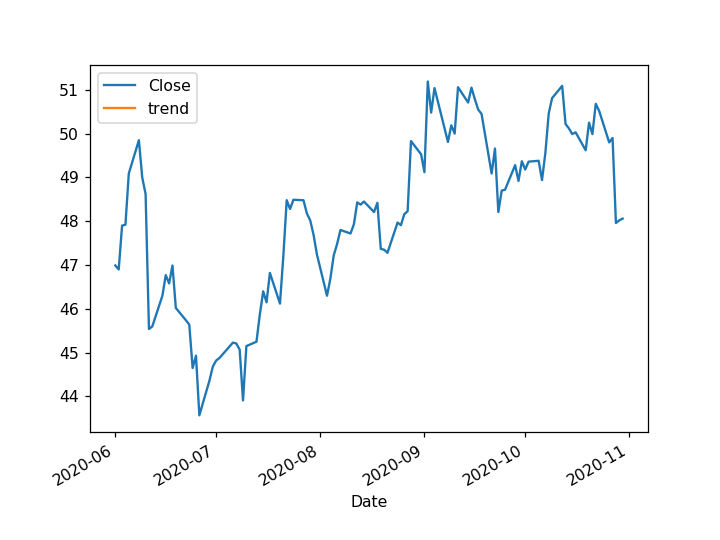

In [7]:
df[['Close','trend']].plot()

In [8]:
fig, axs = plt.subplots(2,figsize=(10,8))
fig.subplots_adjust(hspace=0.3)
fig.suptitle('STOCK')
axs[0].plot(df[['Close']])
axs[0].set_title('Close with EWMA-5')
axs[0].legend(['Close','EWMA-5'])
axs[0].grid()

for day,i in df.iterrows():
    sf = i['Close']
    sf1 = i['Closes1']
    sf2 = i['Closes2']
    sfb1 = i['Closesb1']
    sfb2 = i['Closesb2']
#     print('day',day.date())
#     print(day - datetime.timedelta(days=1))
#     daybefore = day - datetime.timedelta(days=1)
#     dayafter = day + datetime.timedelta(days=1)
#     print('daybf',daybefore.date())
    if sf>sf1 and sf>sfb1 and sf>sf2 and sf>sfb2:
        axs[0].scatter(x=day,y=df.loc[day,'Close'],color='red')
        df.loc[day,'signal'] = 'sold'
#         while daybefore not in df.index:
#             daybefore = daybefore - datetime.timedelta(days=1)
#             print(daybefore)
            
        df.loc[daybefore,'signal'] = 'sold'
        df.loc[dayafter,'signal'] = 'sold'
    elif sf<sf1 and sf<sfb1 and sf<sf2 and sf<sfb2:
        axs[0].scatter(x=day,y=df.loc[day,'Close'],color='green')
        df.loc[day,'signal'] = 'buy'
        df.loc[daybefore,'signal'] = 'buy'
        df.loc[dayafter,'signal'] = 'buy'
    
#     else:
#         df.loc[day,'signal'] = 'Wait and Hold'
   


<IPython.core.display.Javascript object>

NameError: name 'daybefore' is not defined

In [ ]:
df['signal'].head(30)

In [ ]:
df['signal'] = np.where(df['signal'].isnull() ,'Wait or Hold',df['signal'])

In [ ]:
df['signal'] = np.where()

In [ ]:
df['buy'] = np.where(df['signal'] == 'buy',df['Close'],np.nan)
df['sold'] = np.where(df['signal'] == 'sold',df['Close'],np.nan)

In [28]:
plt.figure(figsize=(10,7))
plt.grid()
plt.plot(df['Close'])
plt.plot(df['buy'],color='green')
plt.plot(df['sold'],color='red')
plt.ylabel('Price')
plt.xlabel('Date')

<IPython.core.display.Javascript object>

KeyError: 'buy'

In [29]:
day = '2020-06-01'
print(type(day))
if day in df.index:
    print(1)
df.index

<class 'str'>
1


DatetimeIndex(['2020-06-01', '2020-06-02', '2020-06-03', '2020-06-04',
               '2020-06-05', '2020-06-08', '2020-06-09', '2020-06-10',
               '2020-06-11', '2020-06-12', '2020-06-15', '2020-06-16',
               '2020-06-17', '2020-06-18', '2020-06-19', '2020-06-22',
               '2020-06-23', '2020-06-24', '2020-06-25', '2020-06-26',
               '2020-06-29', '2020-06-30', '2020-07-01', '2020-07-02',
               '2020-07-06', '2020-07-07', '2020-07-08', '2020-07-09',
               '2020-07-10', '2020-07-13', '2020-07-14', '2020-07-15',
               '2020-07-16', '2020-07-17', '2020-07-20', '2020-07-21',
               '2020-07-22', '2020-07-23', '2020-07-24', '2020-07-27',
               '2020-07-28', '2020-07-29', '2020-07-30', '2020-07-31',
               '2020-08-03', '2020-08-04', '2020-08-05', '2020-08-06',
               '2020-08-07', '2020-08-10', '2020-08-11', '2020-08-12',
               '2020-08-13', '2020-08-14', '2020-08-17', '2020-08-18',
      

In [30]:
i = [1,2,3,4]
x = pd.Timestamp('2020-06-07')
print(type(x))
while x  in df.index:
    print(x)
    x = x - datetime.timedelta(days=1)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [31]:
df.index[0]

Timestamp('2020-06-01 00:00:00')